In [351]:
# Run some setup code for this notebook.
seed = 3
import numpy as np
np.random.seed(seed) # set random seed so output is deterministic
import matplotlib.pyplot as plt


# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Dataset

In [352]:
import pandas as pd
df = pd.read_csv('loan.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## Dataset Info

In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## Data Cleaning

In [354]:
df.drop("Loan_ID", axis=1, inplace=True)
# Checking the Missing Values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [355]:
################################################################################
# TODO:                                                                        #
# Task1 deal with NULL rows, you can either choose to drop them or replace them with mean or other value #
################################################################################
#df.dropna(inplace=True, axis=0)
#fill the missing values for float terms with the mean value
for col in df.columns:
    if df[col].dtype == 'float64':
        df[col].fillna(df[col].mean(), inplace=True)
    elif df[col].dtype == 'int64':
        # fill with the frequent value
        df[col].fillna(df[col].value_counts().index[0], inplace=True)
    elif df[col].dtype=='bool':
        df[col].fillna(df[col].value_counts().index[0], inplace=True)
#fill the missing values for object terms with the most frequent value
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna(df[col].value_counts().index[0], inplace=True)
df.isnull().sum()
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Encode 

In [356]:
################################################################################
# TODO:                                                                        #
# Task2 deal with categorical features
# Tip use pd.get_dummies. 
################################################################################

#turn the categorical features into dummy variables
df = pd.get_dummies(df,columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status'])
string_columns = df.select_dtypes(include=['object'])

for col in string_columns:
    df[col]=pd.to_numeric(df[col], errors='coerce')
print(df)
# turn bool to int
for col in df.columns:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)
################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0  146.412162             360.0   
1               4583             1508.0  128.000000             360.0   
2               3000                0.0   66.000000             360.0   
3               2583             2358.0  120.000000             360.0   
4               6000                0.0  141.000000             360.0   
..               ...                ...         ...               ...   
609             2900                0.0   71.000000             360.0   
610             4106                0.0   40.000000             180.0   
611             8072              240.0  253.000000             360.0   
612             7583                0.0  187.000000             360.0   
613             4583                0.0  133.000000             360.0   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
0               1.0          False         True

In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender_Female            614 non-null    int32  
 6   Gender_Male              614 non-null    int32  
 7   Married_No               614 non-null    int32  
 8   Married_Yes              614 non-null    int32  
 9   Dependents_0             614 non-null    int32  
 10  Dependents_1             614 non-null    int32  
 11  Dependents_2             614 non-null    int32  
 12  Dependents_3+            614 non-null    int32  
 13  Education_Graduate       614 non-null    int32  
 14  Education_Not Graduate   6

## Data process

In [358]:
import numpy as np
################################################################################
# TODO:                                                                        #
# Task3 split the dataset into X_train, X_test, y_train, y_test
# Optional: you can also use normalization
################################################################################


for i in (df.columns):
    max=df[i].max()
    min=df[i].min()
    for j in df.index:
        df.loc[j,i]=(df.loc[j,i]-min)/(max-min)




# shuffle the data
df = df.sample(frac=1)
print(df.head())
train_size = int(0.8 * len(df))

X=np.array(df.drop(['Loan_Status_Y','Loan_Status_N'],axis=1))
y=np.array(df['Loan_Status_Y'])
#change type
X=X.astype('float')
y=y.astype('float')
X.shape, y.shape
X_train=X[:train_size]
y_train=y[:train_size]
X_test=X[train_size:]
y_test=y[train_size:]


################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
455         0.045875           0.000000    0.125904           0.74359   
132         0.031763           0.000000    0.088278           0.74359   
244         0.040272           0.106007    0.164978           0.74359   
53          0.055238           0.000000    0.180897           0.74359   
264         0.062041           0.000000    0.172214           0.74359   

     Credit_History  Gender_Female  Gender_Male  Married_No  Married_Yes  \
455             1.0              0            1           0            1   
132             1.0              0            1           1            0   
244             1.0              0            1           0            1   
53              1.0              0            1           0            1   
264             1.0              0            1           1            0   

     Dependents_0  ...  Dependents_3+  Education_Graduate  \
455             0  ...              0      

## Train

In [359]:
from Logistic import *
import matplotlib.pyplot as plt

################################################################################
# TODO:                                                                        #
# Task4 train your model and plot the loss curve of training
# You need to complete the Logistic.py file
# model = LogisticRegression()
################################################################################
penalty='l2'
gama=0.4
bias=True
lr=1e-4
tol=1e-7
max_iter=1e4
penalty_list=['l1','l2']
gama_list=[0,0.1,0.2,0.4,0.8]
lr_list=[1e-4,3e-5,1e-5]
tol_list=[1e-1,1e-2,1e-3]
#model=LogisticRegression('l2',0.4,True)
#losses,accuracy,accuracy_test=model.fit(X_train,y_train,1e-4,1e-7,1e5,X_test,y_test)
#print(losses)
#epochs=np.arange(1,len(losses)+1)
t=0
ploted={}

################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

100%|██████████| 10000/10000 [00:01<00:00, 8762.48it/s]
C:\Users\yiyi0369\AppData\Local\Temp\ipykernel_16864\2054327393.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax1 = plt.subplots(figsize=(8, 6))
100%|██████████| 10000/10000 [00:01<00:00, 8407.76it/s]


{('l1', 0.0): 0.8065173116089613, ('l1', 0.05): 0.8065173116089613, ('l1', 0.1): 0.8085539714867617, ('l1', 0.15000000000000002): 0.8085539714867617, ('l1', 0.2): 0.8085539714867617, ('l1', 0.25): 0.8085539714867617, ('l1', 0.30000000000000004): 0.8085539714867617, ('l1', 0.35000000000000003): 0.8085539714867617, ('l1', 0.4): 0.8085539714867617, ('l1', 0.45): 0.8085539714867617, ('l1', 0.5): 0.8085539714867617, ('l1', 0.55): 0.8105906313645621, ('l1', 0.6000000000000001): 0.8105906313645621, ('l1', 0.65): 0.8085539714867617, ('l1', 0.7000000000000001): 0.8085539714867617, ('l1', 0.75): 0.8065173116089613, ('l1', 0.8): 0.8065173116089613, ('l1', 0.8500000000000001): 0.8065173116089613, ('l1', 0.9): 0.8044806517311609, ('l2', 0.0): 0.8065173116089613, ('l2', 0.05): 0.8065173116089613, ('l2', 0.1): 0.8065173116089613, ('l2', 0.15000000000000002): 0.8065173116089613, ('l2', 0.2): 0.8065173116089613, ('l2', 0.25): 0.8085539714867617, ('l2', 0.30000000000000004): 0.8085539714867617, ('l2', 0

<Figure size 1000x800 with 0 Axes>

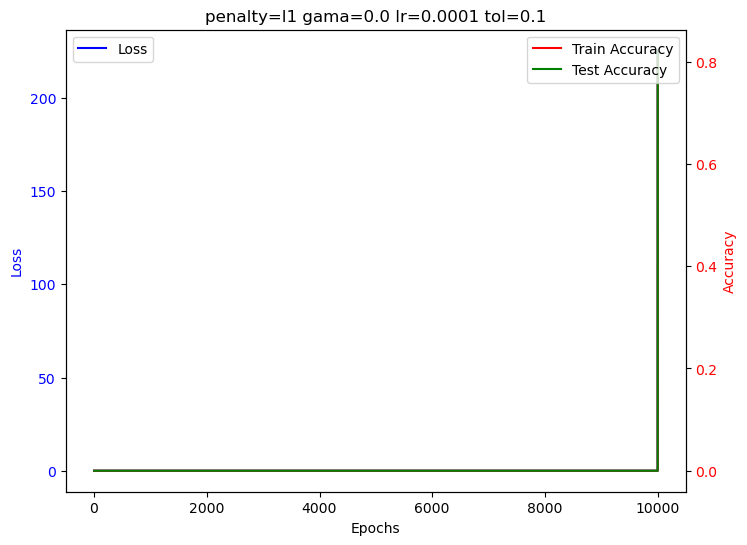

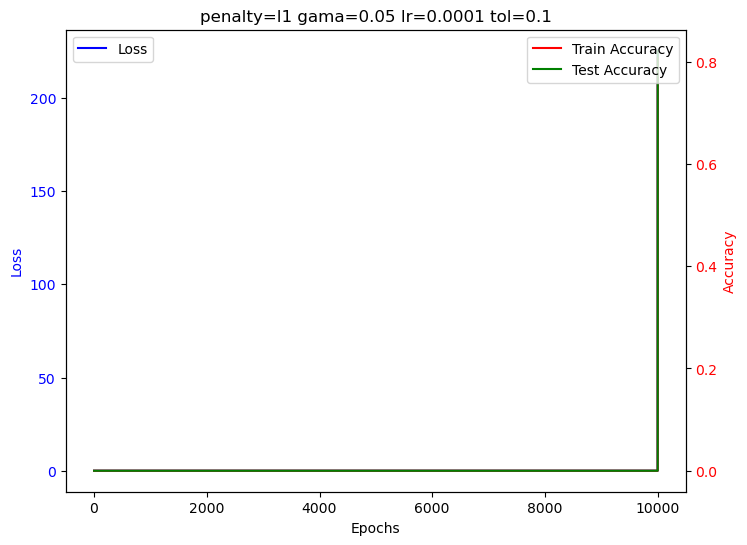

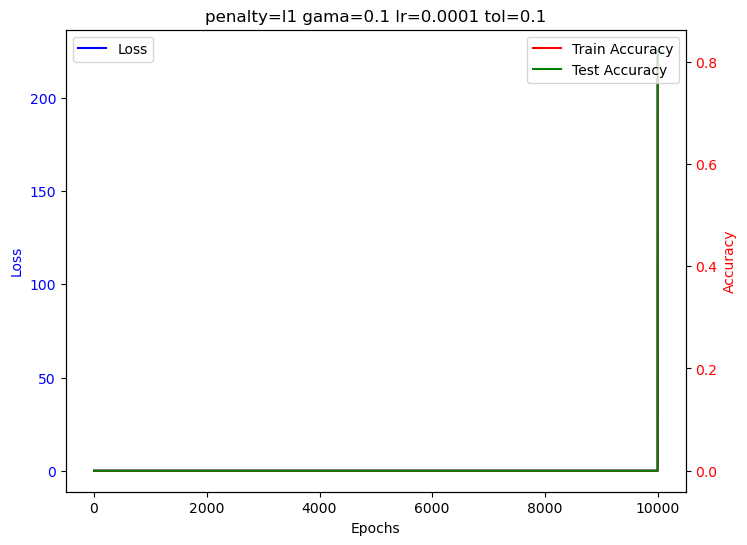

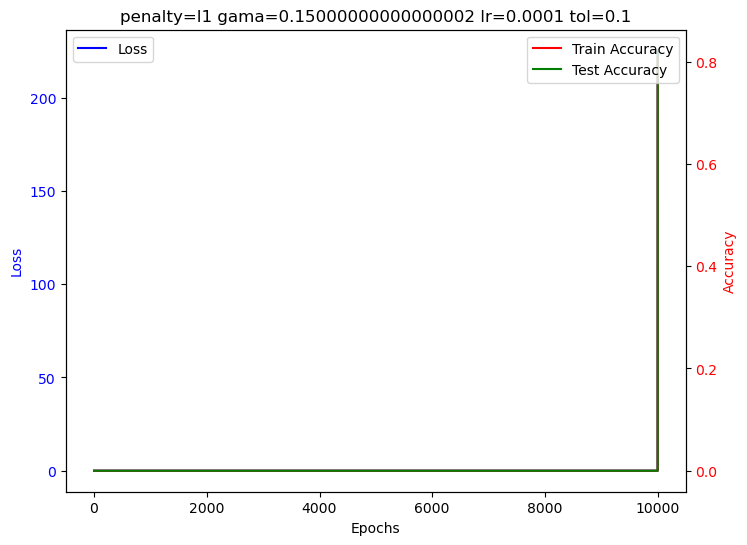

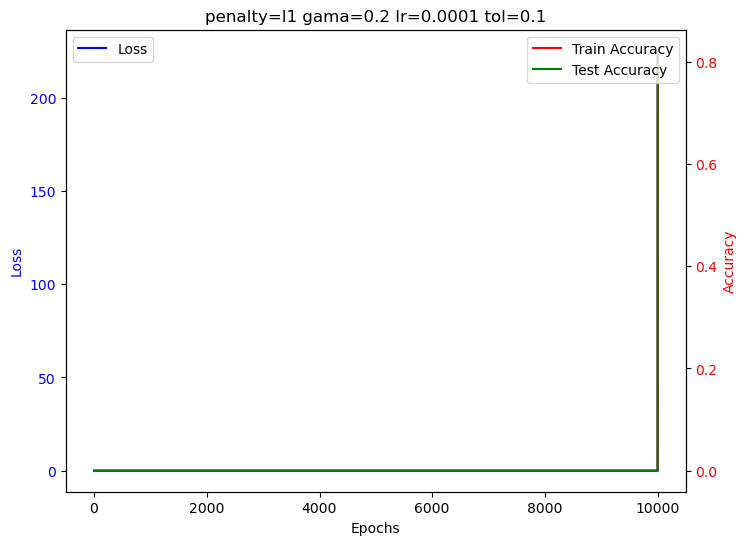

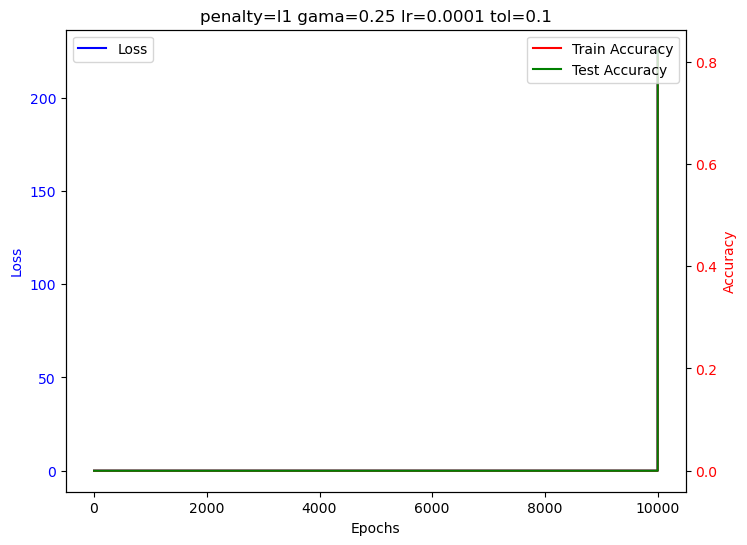

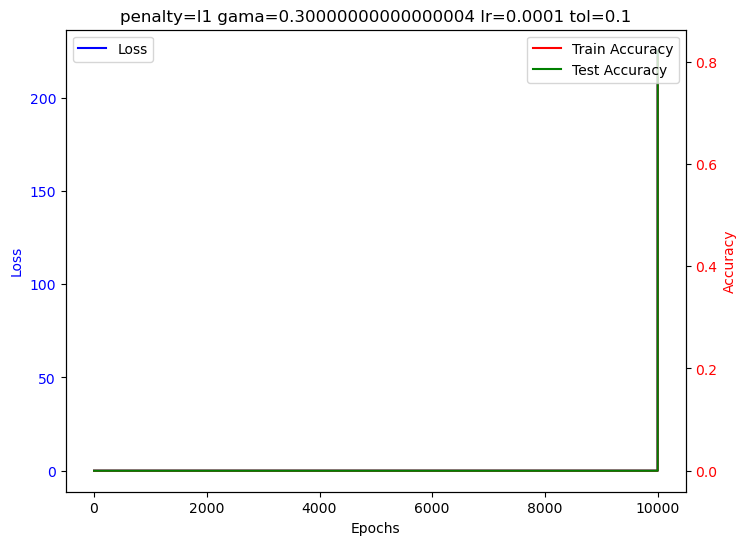

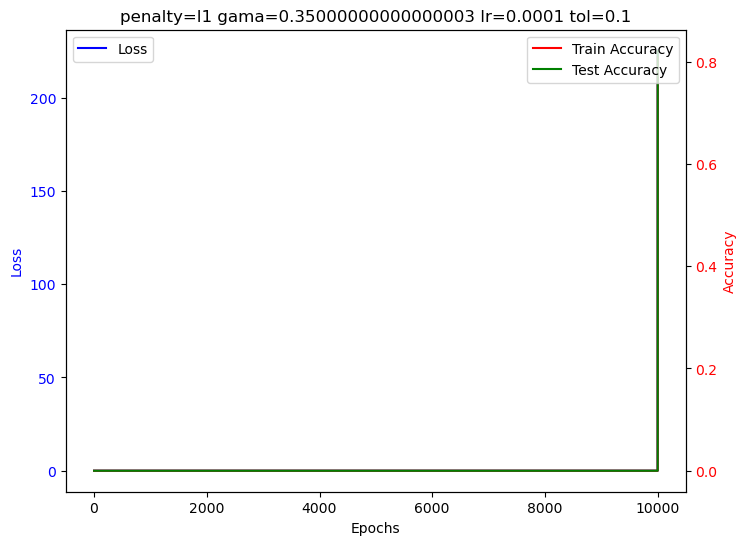

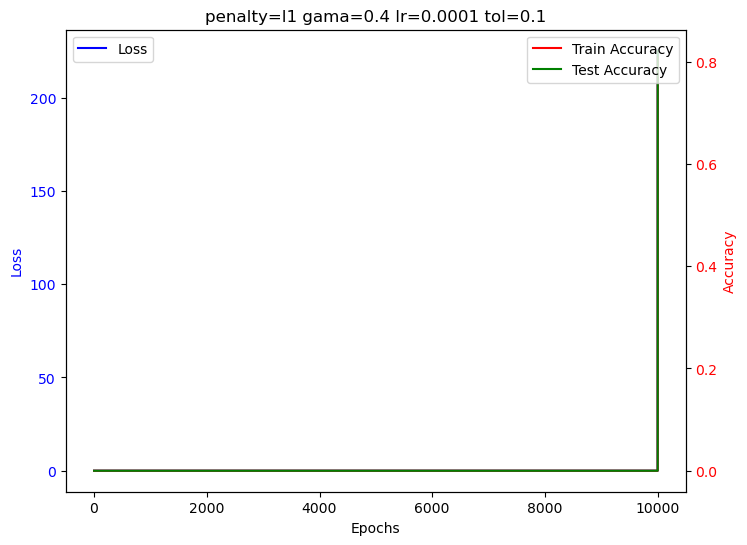

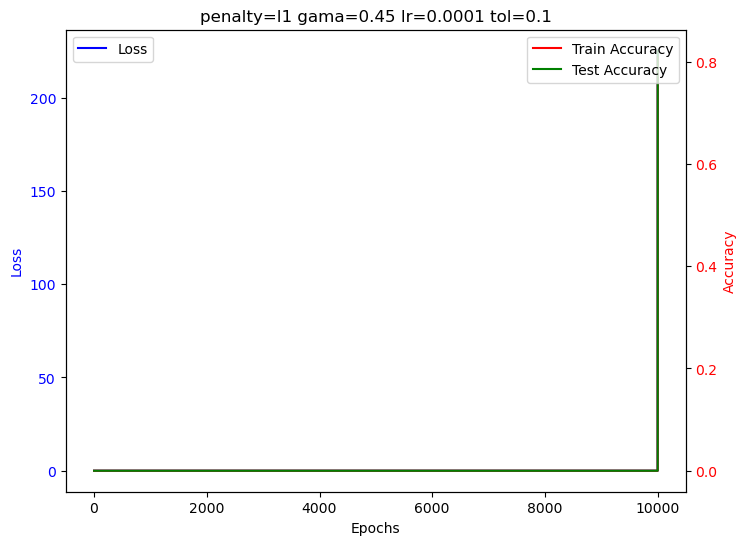

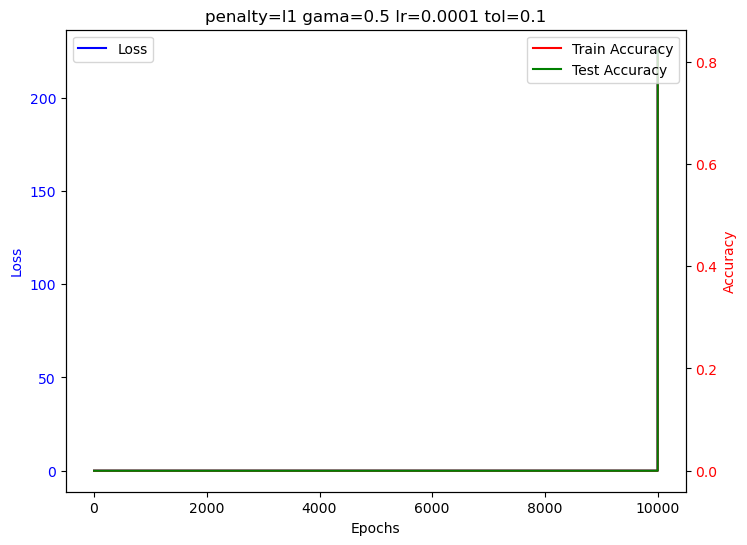

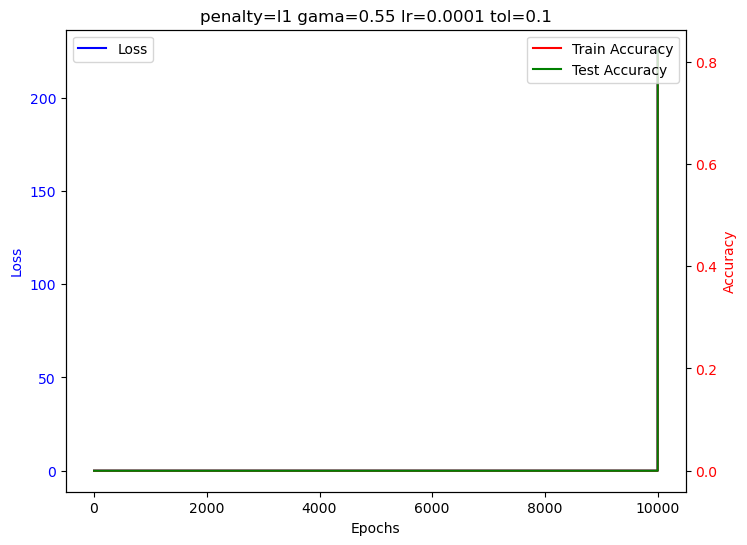

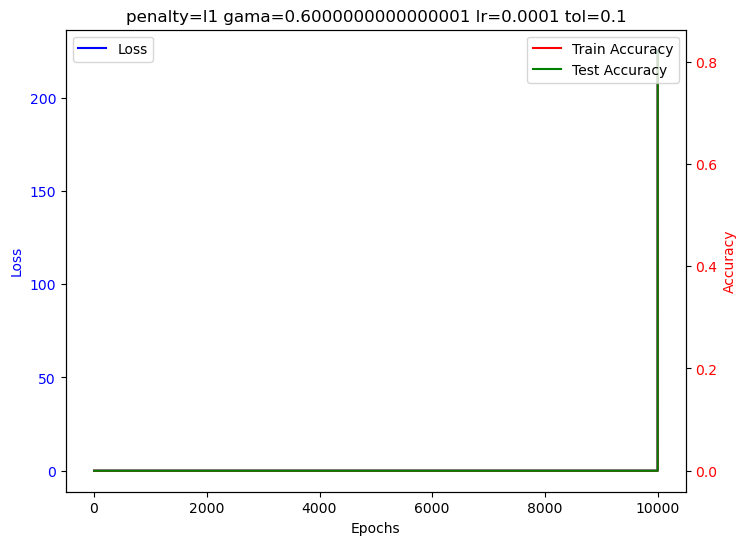

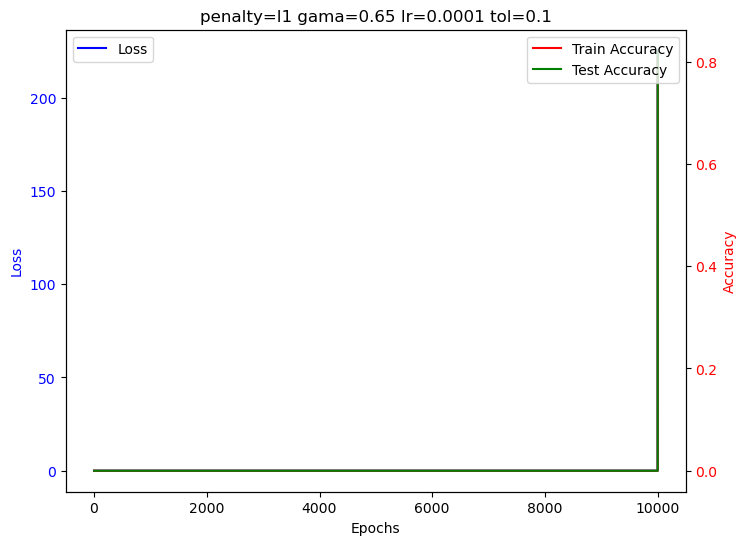

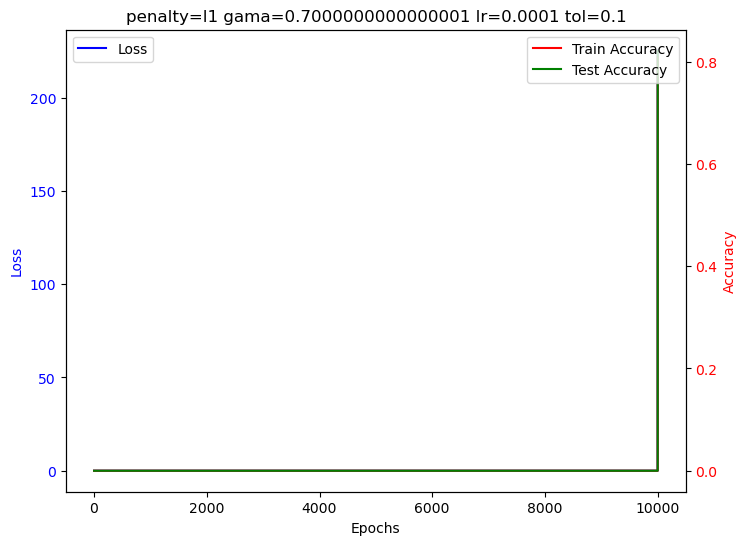

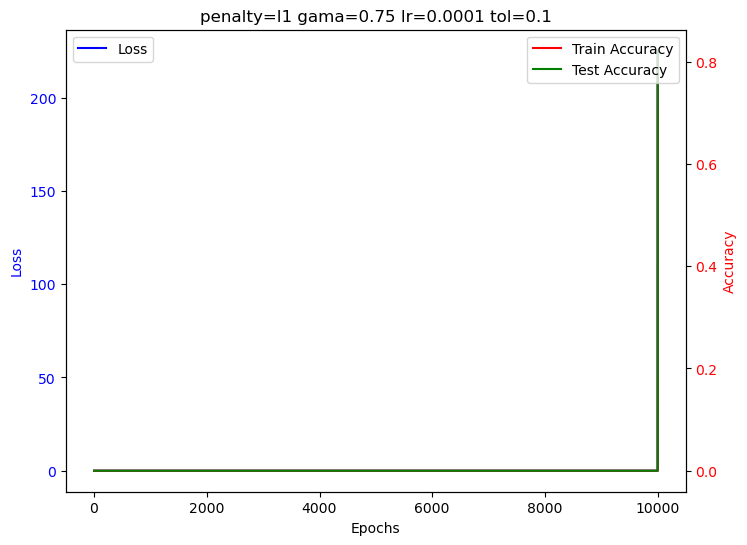

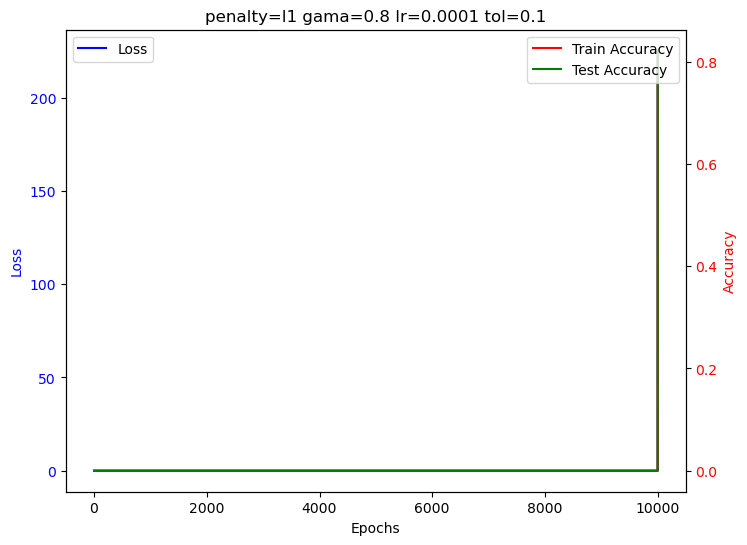

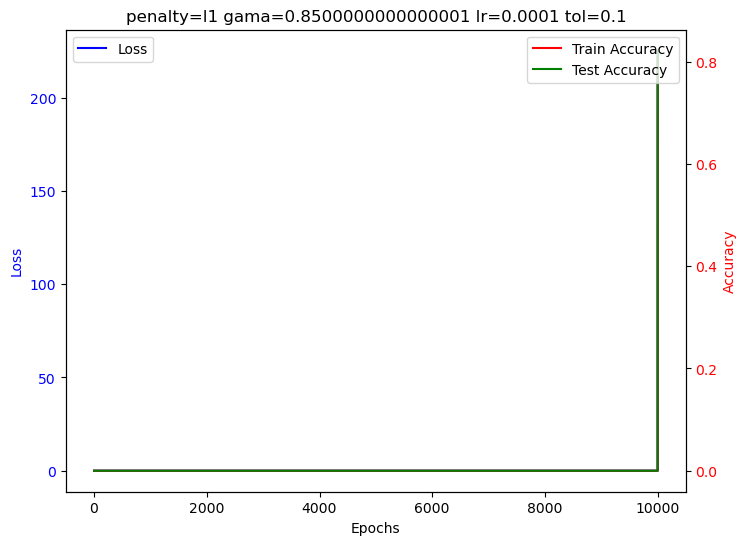

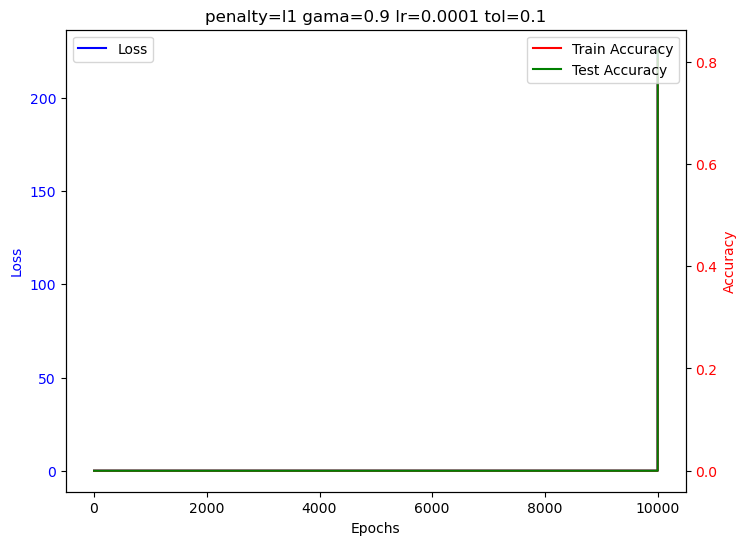

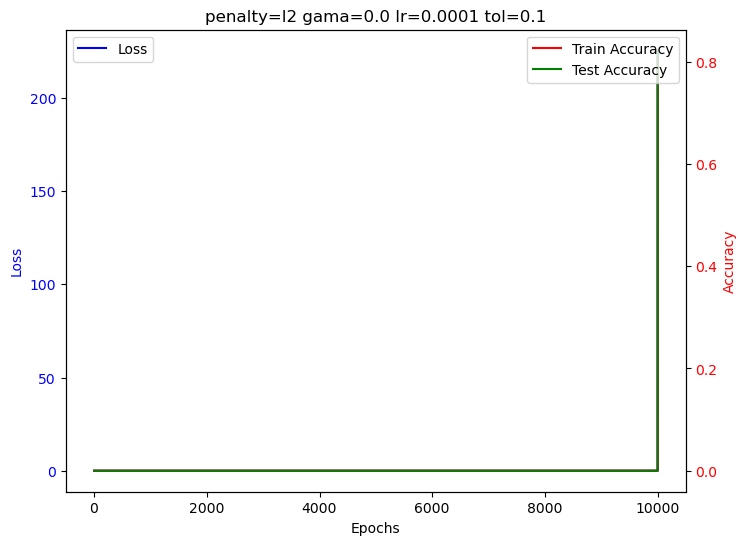

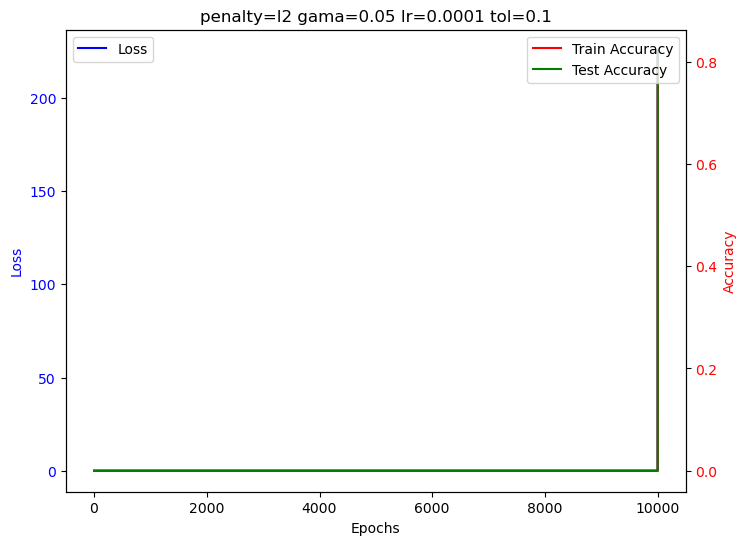

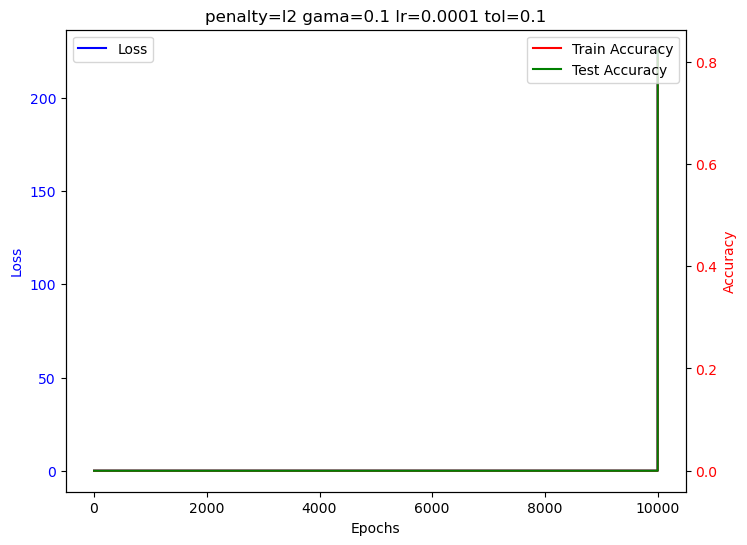

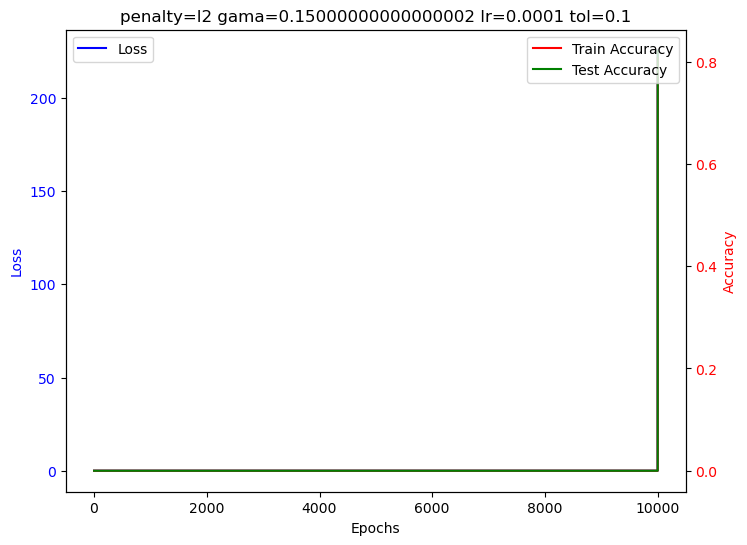

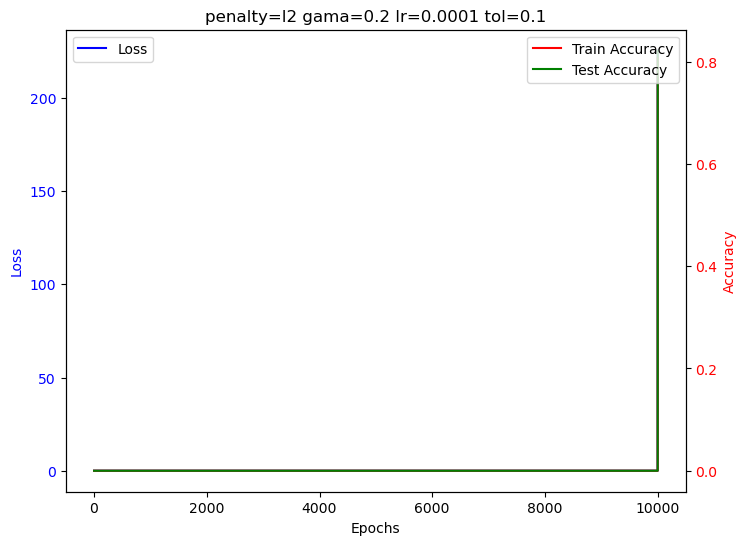

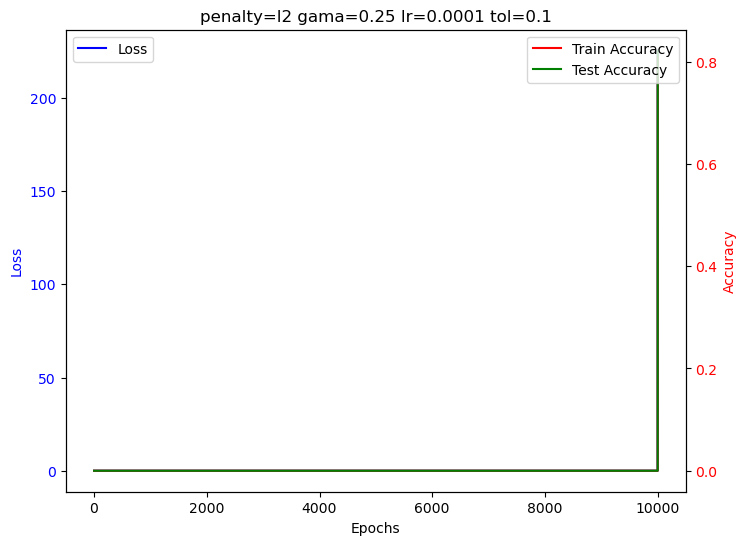

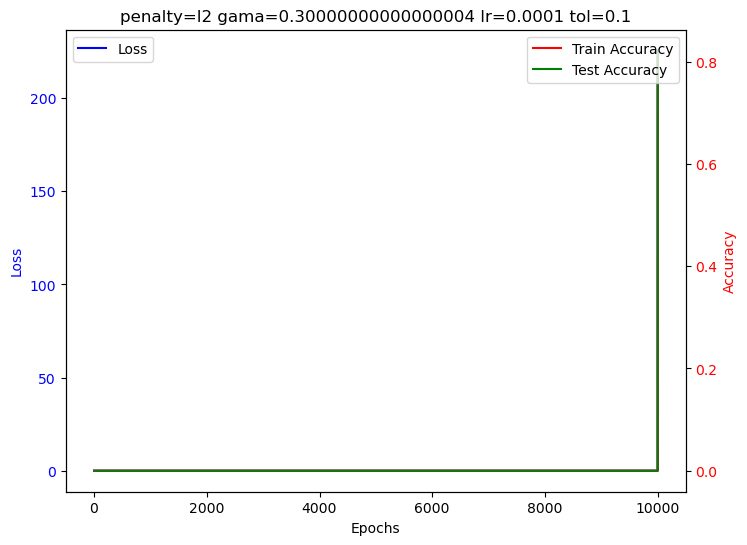

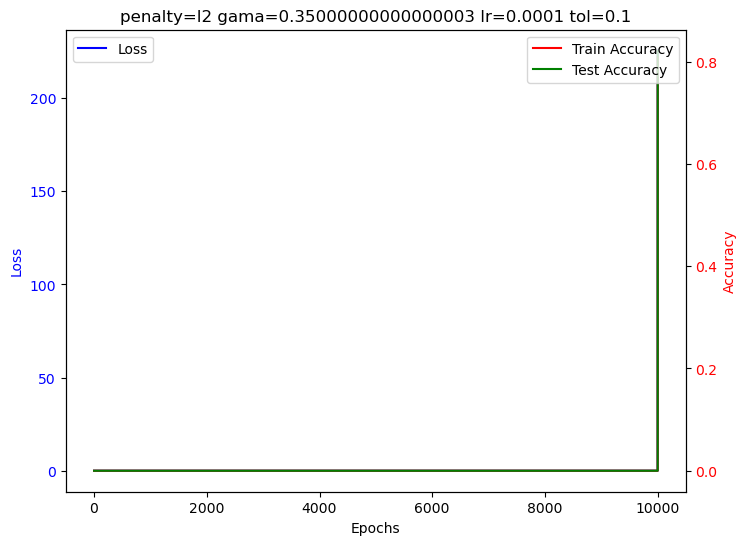

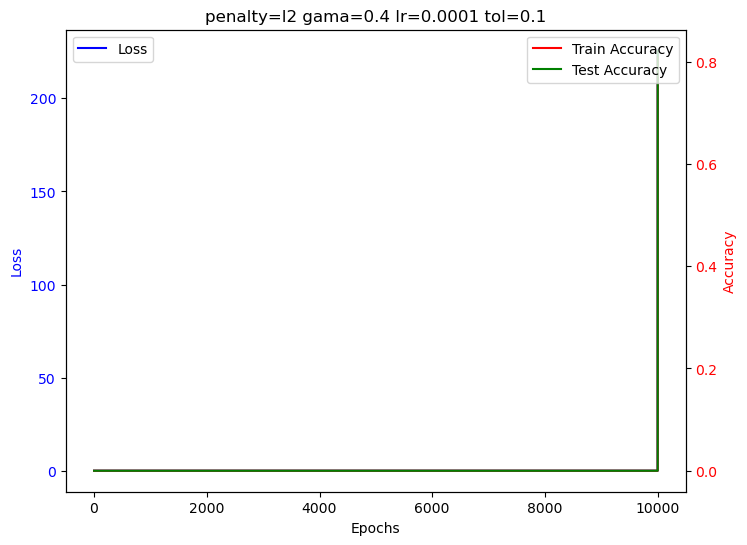

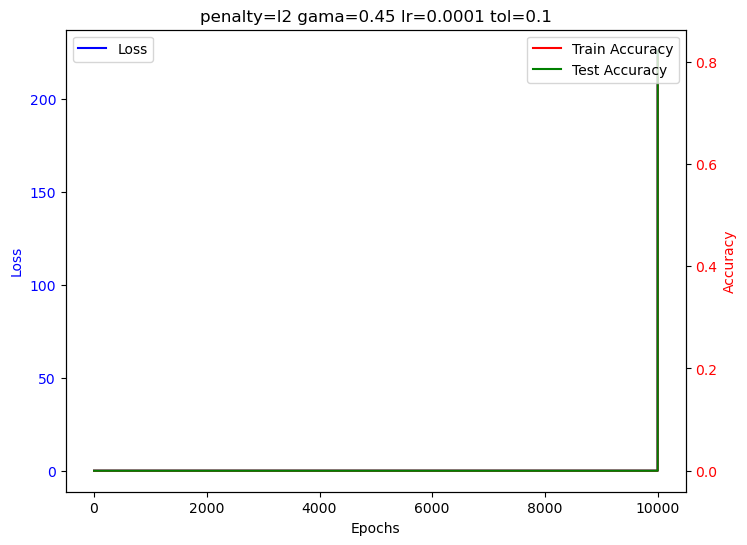

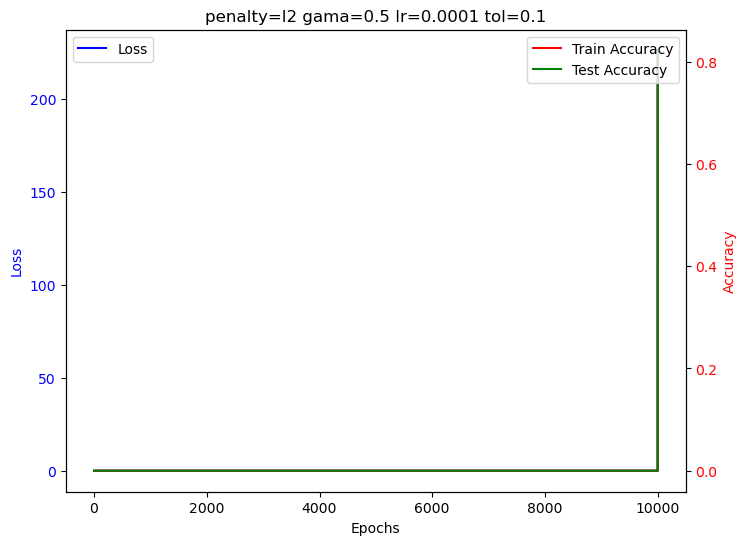

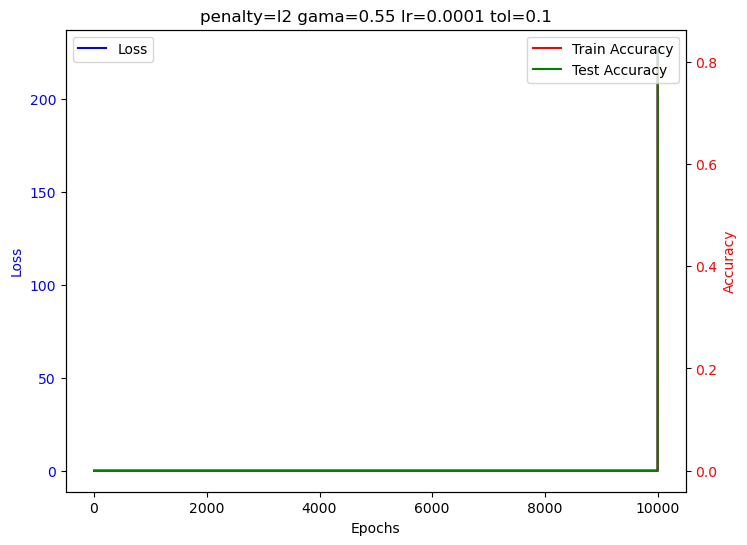

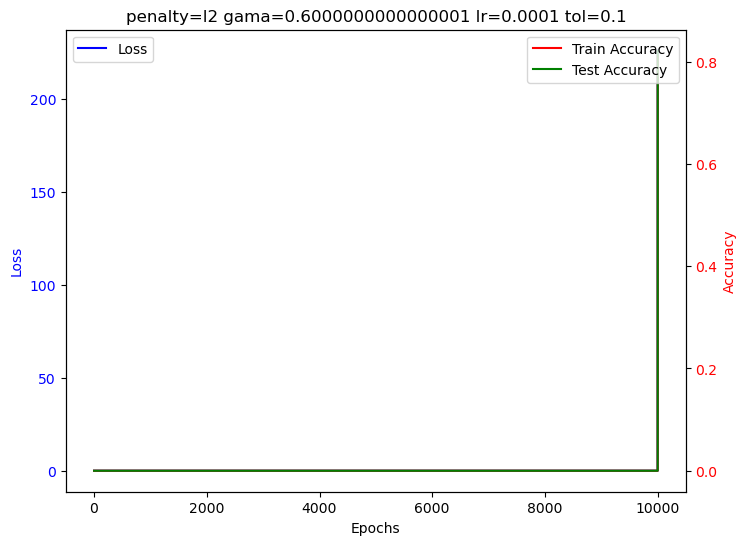

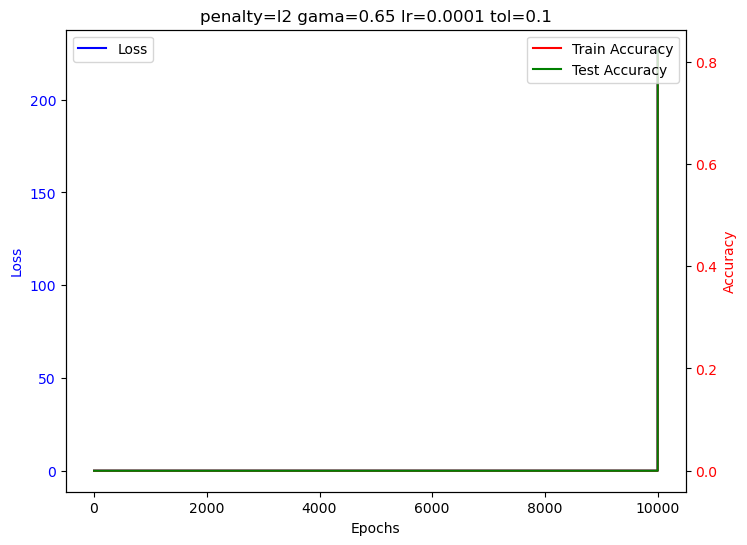

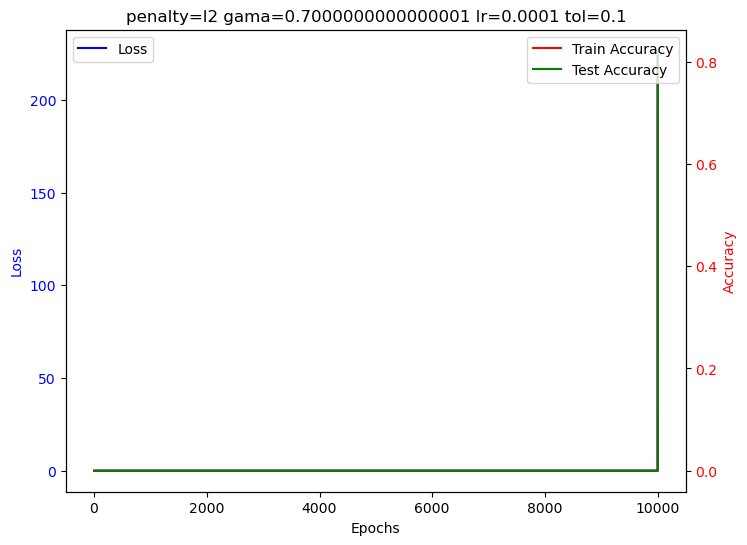

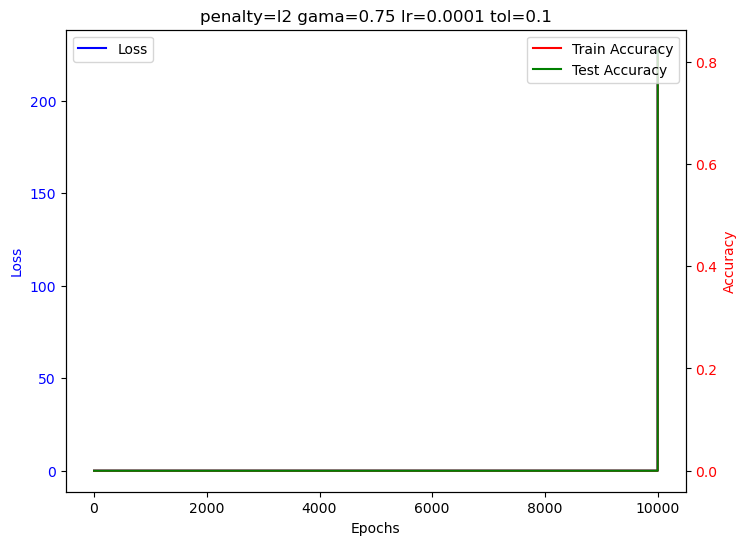

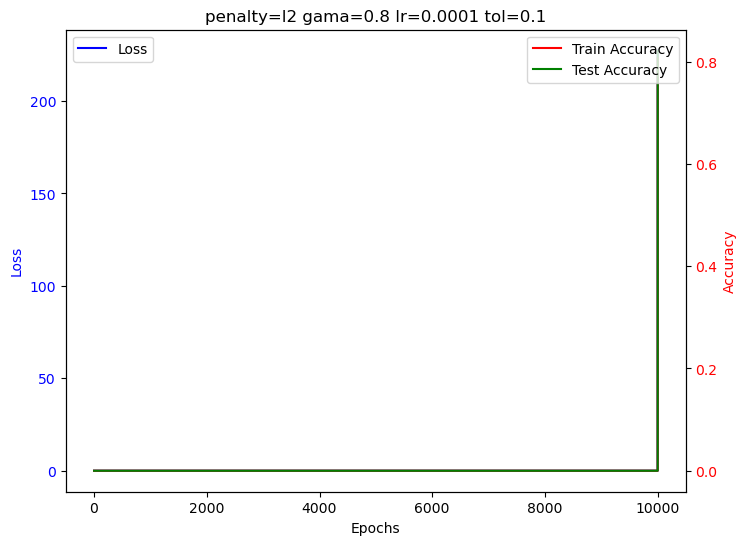

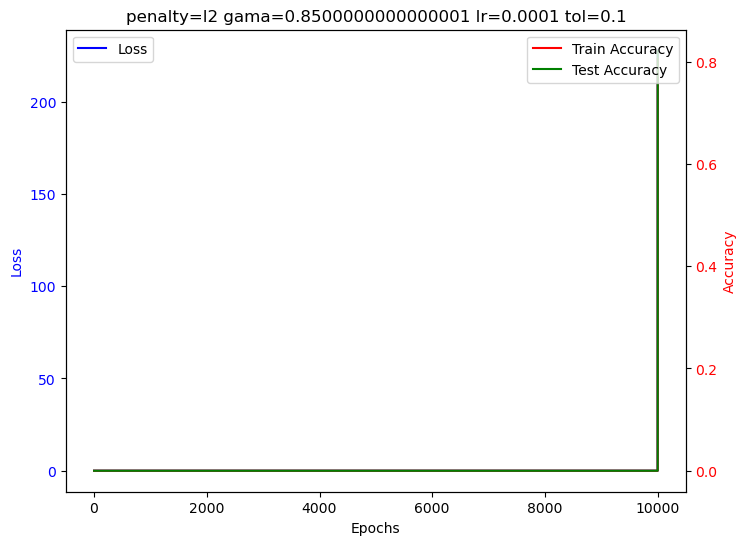

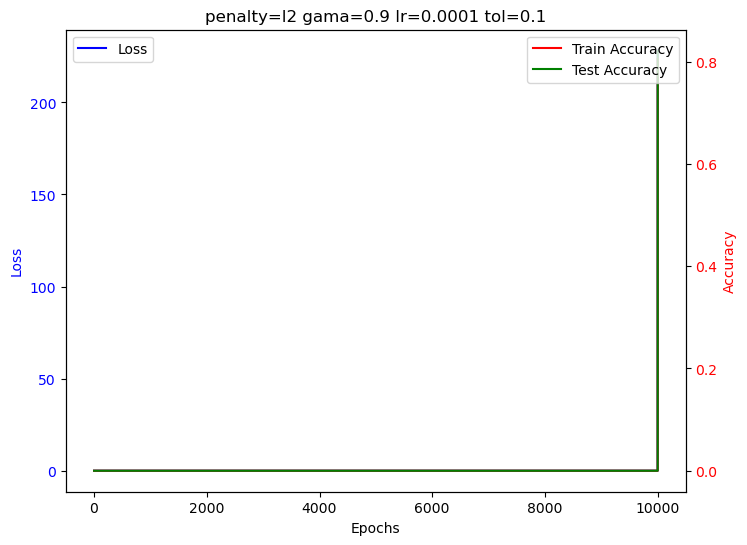

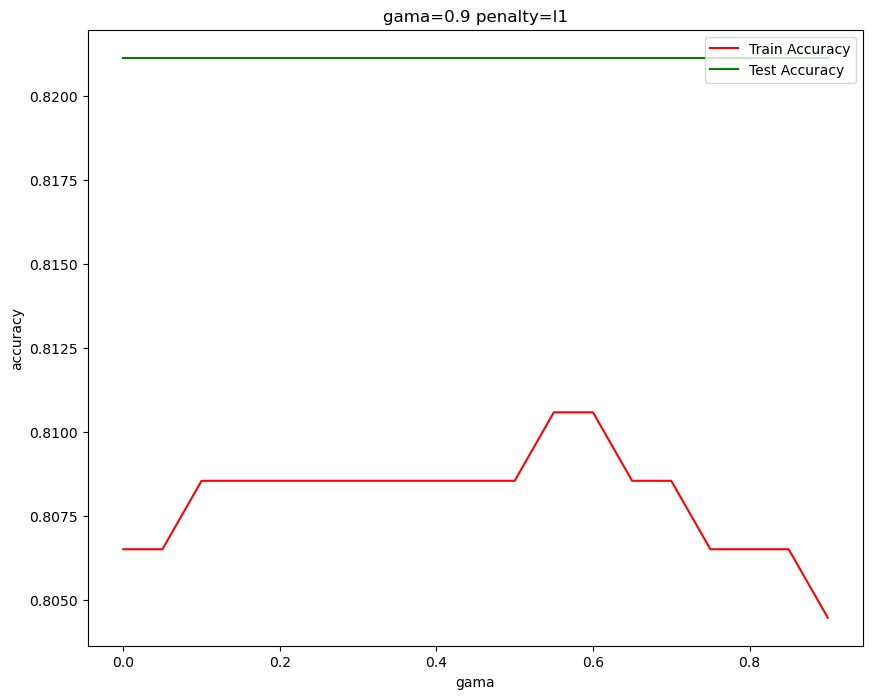

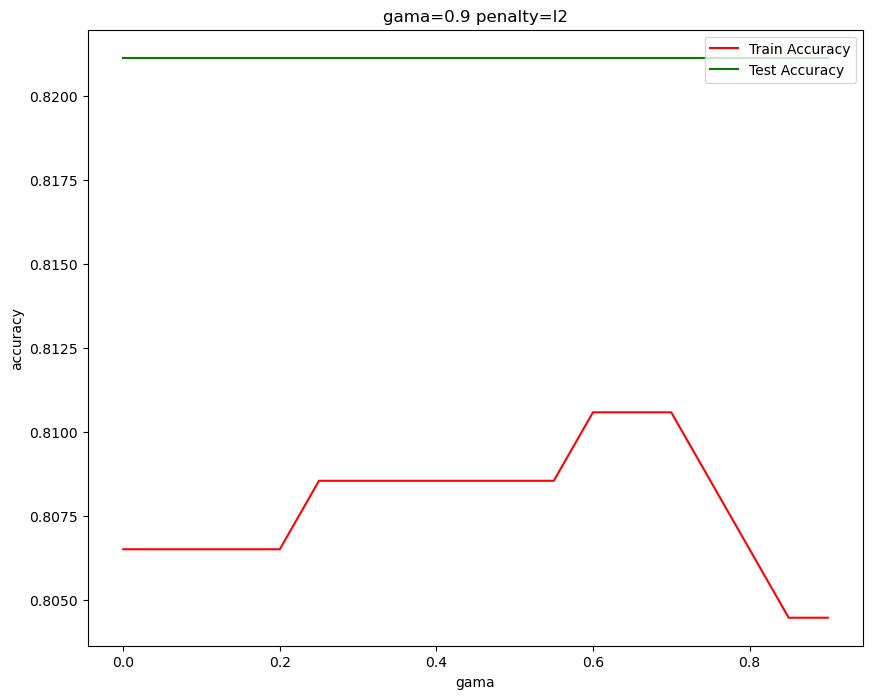

In [360]:
max_iter=1e4
penalty_list=['l1','l2']
gama_list=list(np.arange(0,0.95,0.05))
lr_list=[1e-4]
tol_list=[1e-1]
acc_train_map={}
acc_test_map={}
for penalty in penalty_list:
    for gama in gama_list:
        for lr in lr_list:
            for tol in tol_list:
                if 'penalty='+penalty+' gama='+str(gama)+' lr='+str(lr)+' tol='+str(tol) in ploted:
                    continue
                ploted['penalty='+penalty+' gama='+str(gama)+' lr='+str(lr)+' tol='+str(tol)]=1
                model=LogisticRegression(penalty,gama,True)
                losses,accuracy,accuracy_test=model.fit(X_train,y_train,lr,tol,max_iter,X_test,y_test)
                acc_train_map[(penalty,gama)]=accuracy[-1]
                acc_test_map[(penalty,gama)]=accuracy_test[-1]
                epochs=np.arange(1,len(losses)+1)
                #switch to new figure
                t=t+1
                plt.figure(t)
                # set the title of the figure
                
                fig, ax1 = plt.subplots(figsize=(8, 6))
                ax1.set_title('penalty='+penalty+' gama='+str(gama)+' lr='+str(lr)+' tol='+str(tol))
                ax2 = ax1.twinx()

# 在第一个子图中绘制第一条曲线
                ax1.plot(epochs, losses, color='blue')
                ax1.set_xlabel('Epochs')
                ax1.set_ylabel('Loss', color='blue')
                ax1.tick_params(axis='y', labelcolor='blue')

# 在第二个子图中绘制第二条曲线
                ax2.plot(epochs, accuracy, color='red')
                ax2.set_ylabel('Accuracy', color='red')
                ax2.tick_params(axis='y', labelcolor='red')

# 在第三个子图中绘制第三条曲线
                ax2.plot(epochs, accuracy_test, color='green')
                ax1.legend(['Loss'], loc='upper left')
                ax2.legend(['Train Accuracy','Test Accuracy'], loc='upper right')
                #ax1.savefig('penalty='+penalty+' gama='+str(gama)+' lr='+str(lr)+' tol='+str(tol)+'.png')
                # save the figure
                #plt.savefig('penalty='+penalty+' gama='+str(gama)+' lr='+str(lr)+' tol='+str(tol)+'.png')
                #plt.show()
print(acc_train_map)
print(acc_test_map)
for penalty in penalty_list:
    plt.figure(penalty)
    temp_1=[]
    temp_2=[]
    plt.title('gama='+str(gama)+' penalty='+penalty)
    plt.xlabel('gama')
    plt.ylabel('accuracy')
    
    for gama in gama_list:
    
        # plot the accuracy
        
        temp_1.append(acc_train_map[(penalty,gama)])
        temp_2.append(acc_test_map[(penalty,gama)])
    plt.plot(gama_list, temp_1, color='red')
    plt.plot(gama_list, temp_2, color='green')
    plt.legend(['Train Accuracy','Test Accuracy'], loc='upper right')
    plt.savefig('gama='+str(gama)+' penalty='+penalty+'.png')
    plt.show()

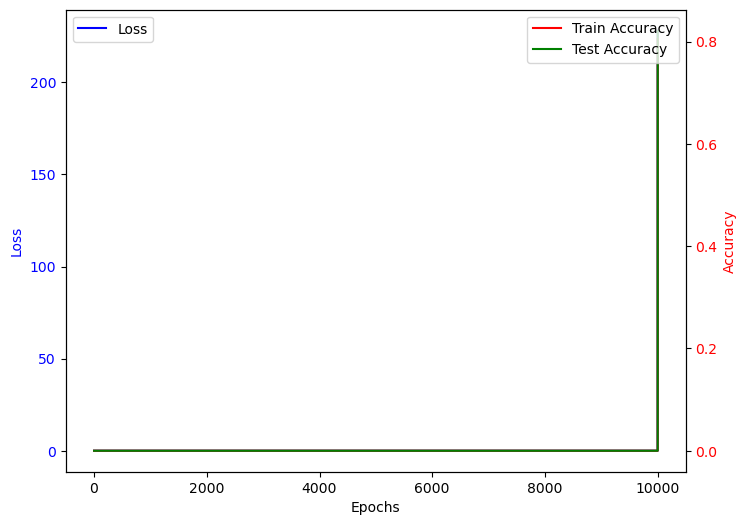

In [361]:
epochs=np.arange(1,len(losses)+1)

# 创建一个包含两个子图的图形
fig, ax1 = plt.subplots(figsize=(8, 6))
ax2 = ax1.twinx()

# 在第一个子图中绘制第一条曲线
ax1.plot(epochs, losses, color='blue')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 在第二个子图中绘制第二条曲线
ax2.plot(epochs, accuracy, color='red')
ax2.set_ylabel('Accuracy', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 在第三个子图中绘制第三条曲线
ax2.plot(epochs, accuracy_test, color='green')
ax1.legend(['Loss'], loc='upper left')
ax2.legend(['Train Accuracy','Test Accuracy'], loc='upper right')


## Test

In [362]:
################################################################################
# TODO:                                                                        #
# Task5 compare the accuracy(or other metrics you want) of test data with different parameters you train with
################################################################################


y_pred=model.predict(X_train)
rate=0
for i in range(len(y_pred)):
    if y_pred[i]==y_train[i]:
        rate+=1
print('train acc:')
print(rate/len(y_pred))
y_pred=model.predict(X_test)
rate=0

rate=get_acc(y_pred,y_test)
print('test acc:')
print(rate)
    



################################################################################
#                                 END OF YOUR CODE                             #
################################################################################

train acc:
0.8044806517311609
test acc:
0.8211382113821138


In [365]:
for item in temp_2:
    print(item)

0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
0.8211382113821138
